# Bike Sharing Assignment- Ashutosh Kumar Sahu #

## Problem Statement ##

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1) Which variables are significant in predicting the demand for shared bikes.
2) How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')



## Reading and loading the data from CSV file ##

In [3]:
bike= pd.read_csv("day.csv")

## EDA ##

In [4]:
bike.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Verify the info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


bike.describe()

In [8]:
# check the rows and column in the dataframe
bike.shape

(730, 16)

### Data Analysis 
    There are 730 rows and 16 columns
    'dteday' column is object type (date) and other columns are integer and float type
    the columns could be categorical type, after more analysis we can treat the columns.

In [11]:
# checking the missing value in columns
(bike.isnull().sum()/len(bike))*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
# Checking missing value in row
(bike.isnull().sum(axis=1)/len(bike))*100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

### There is no missing value in columns and rows ###

In [13]:
# checking the duplicates in dataframe
bike_dupl=bike.copy()
bike_dupl.drop_duplicates(subset=None,inplace=True)

In [14]:
bike_dupl.shape

(730, 16)

In [15]:
bike.shape

(730, 16)

### There are no duplicates in the dataframe ###

In [17]:
# Cleaning the Data, Verify the junk data in the dataframe
bike.value_counts().head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

There is no juck data in the dataframe.

Refering the data dictonary and the data we can remove the unwanted columns
1. instant can be removed as this is index in the table
2. dteday can be removed as there is already month and yr column present in the data set
3. casual & registered canbe removed and this is the count of bike booked by different categories of customers. The data set saved as bike_new

In [18]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
bike_new=bike[[  'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt']]

In [21]:
bike_new.shape

(730, 12)

In [22]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


'season','mnth','weekday','weathersit' are catagorical variables, converting to categorical variable

In [23]:
# converting int64 to categorical variable
# Convert season into categorical variable
bike_new['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bike_new['season'].value_counts()


season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [24]:
# Convert 'mnth' into categorical variable 

import calendar

bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_new['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [25]:
# converting 'weekday' into objectin preparation for making dummy variable

bike_new['weekday'] = bike_new['weekday'].astype('object')

In [26]:
# Convert 'weathersit' into a categorical variable

bike_new['weathersit']=bike_new['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
bike_new['weathersit'].value_counts()

weathersit
Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: count, dtype: int64

In [27]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Univariate Analysis ##

Numirical variables

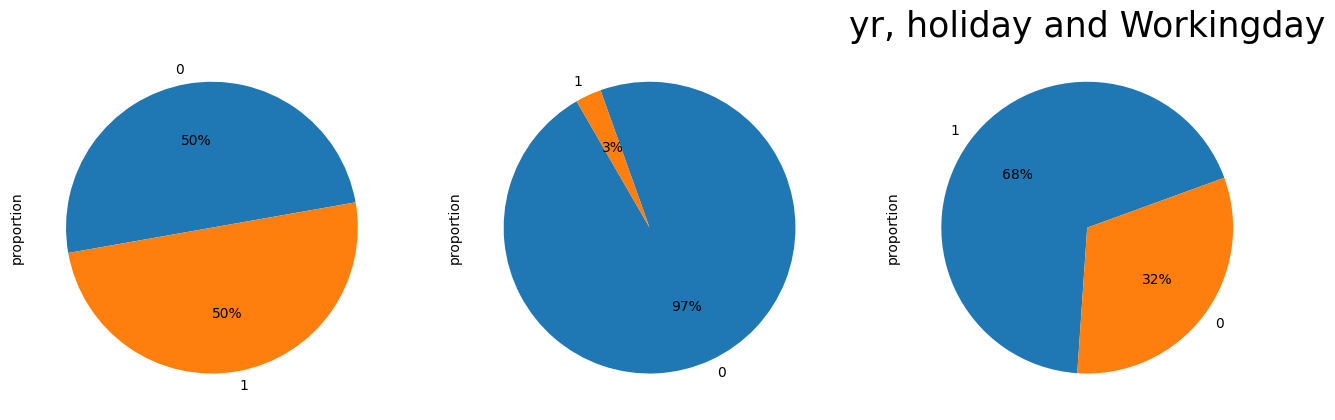

In [47]:
plt.figure(figsize = [16,14])
plt.subplot(131)
bike_new['yr'].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
bike_new['holiday'].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%", startangle=120)
plt.subplot(133)
bike_new['workingday'].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%", startangle=20)
plt.title('yr, holiday and Workingday',fontsize=25)
plt.show()

1. 'yr' uses 50%-50% of daily records as per the above pie chart
2.  less no in holidays(1) as compared to non holidays
3.  higher no of bike useas in working days as compare to non working days.

Categorical Variables

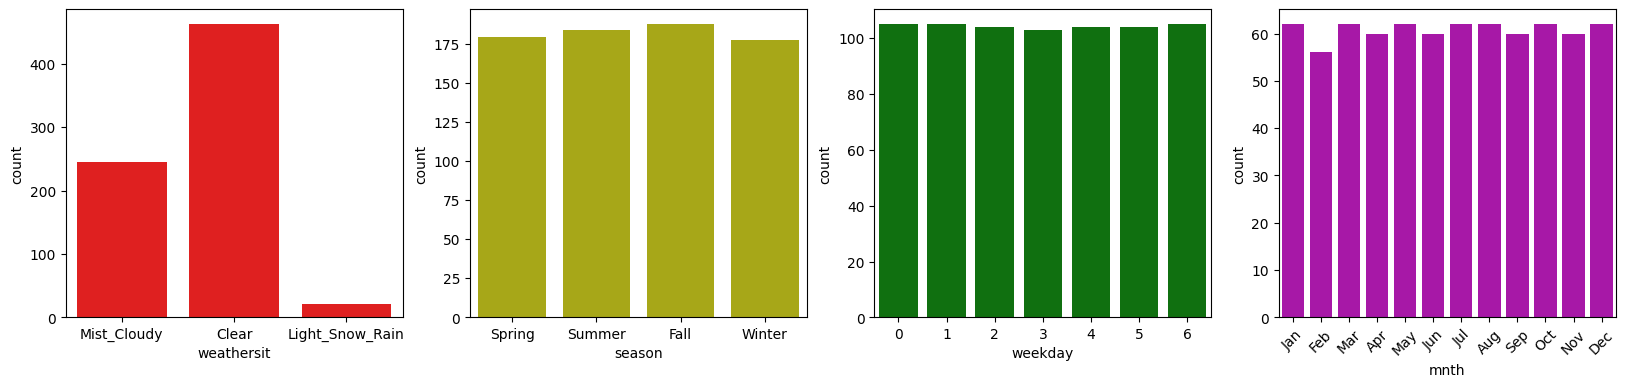

In [54]:
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = bike_new, x = 'weathersit',color='r')
plt.subplot(142)
sns.countplot(data = bike_new, x = 'season',color='y')
plt.subplot(143)
sns.countplot(data = bike_new, x = 'weekday',color='g')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = bike_new, x = 'mnth',color='m')
plt.show()

When weatersit is clear there are more usases of the bikes

## Bivariate Analysis ##

Numrical variable vs cnt

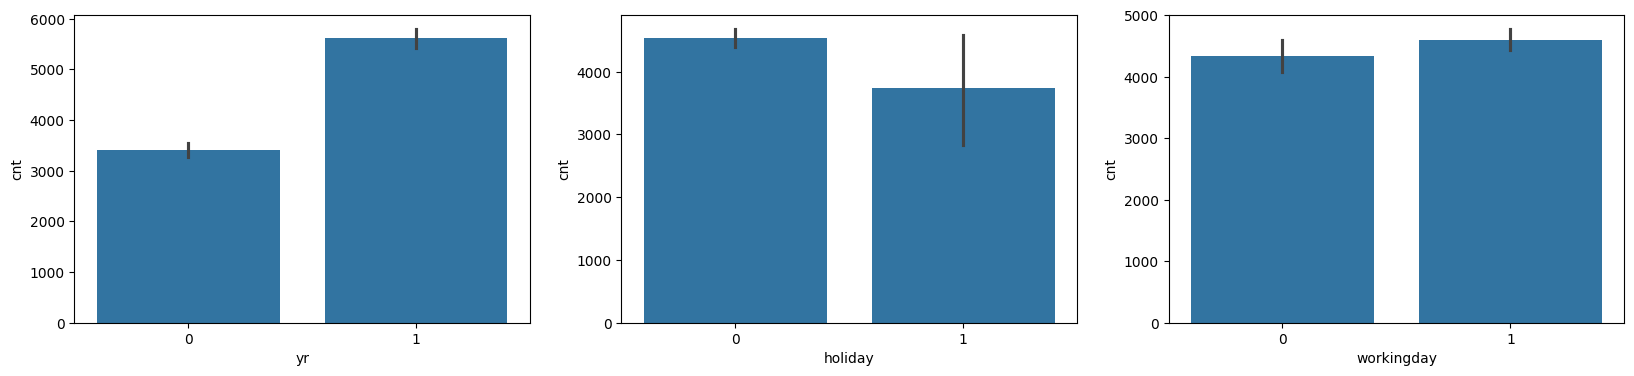

In [64]:
plt.figure(figsize = [20,4])
plt.subplot(131)
sns.barplot(x=bike_new['yr'],y=bike_new['cnt'] ,data = bike_new)
plt.subplot(132)
sns.barplot(x=bike_new['holiday'],y=bike_new['cnt'], data = bike_new)
plt.subplot(133)
sns.barplot(x=bike_new['workingday'],y=bike_new['cnt'], data = bike_new)
plt.show()

### Catagorical Variables Variables vs 'cnt' ###
1.Box plot of all Catagorical Variables Variables against cnt

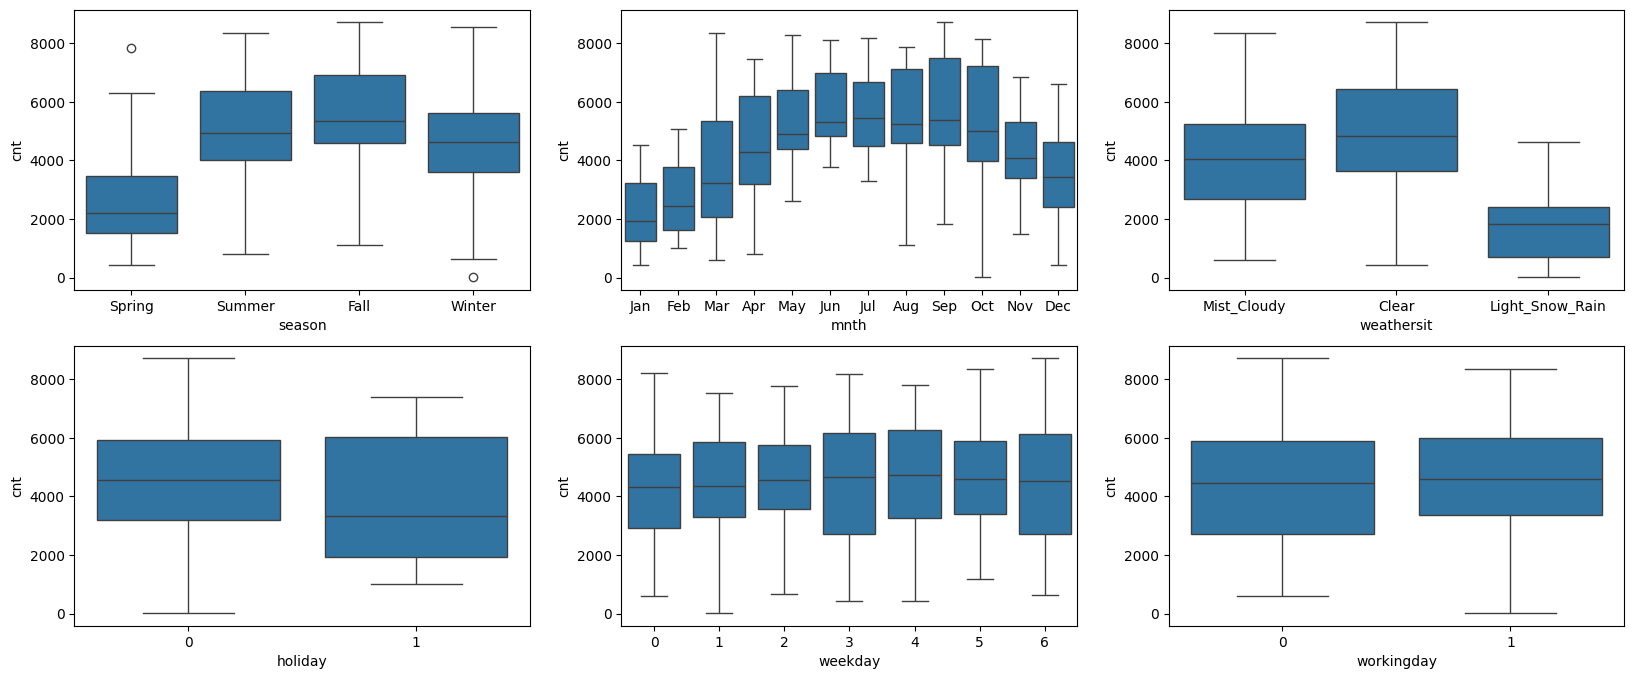

In [65]:
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.show()

Insights
1) season- Fall season is having median 5000 followed by summer, Winter and Spring. It can be a good predicator for dependent variable
2) Mnth- bike booking the more in 5,6,7,8 & 9 with a median of over 4000 booking per month. It can be a good predicator for dependent variable
3) weathersit- clear weathersit is having 5000 median followed by mist_cloudly and light snow rain.It can be a good predicator for dependent variable
4) holiday- maximum bike booking happening when it is not holiday.It could not be good predicator for dependent variable
5) weekday- it is showing very close trend. 
6) workingday- Maximum bike booking happnes on the working day and median is 5000.It can be a good predicator for dependent variable
    
    

## Correlation Matrix ##

In [79]:
bike_heat=bike[[   'yr',  'holiday',
       'workingday',  'temp', 'atemp', 'hum', 'windspeed',
        'cnt']]

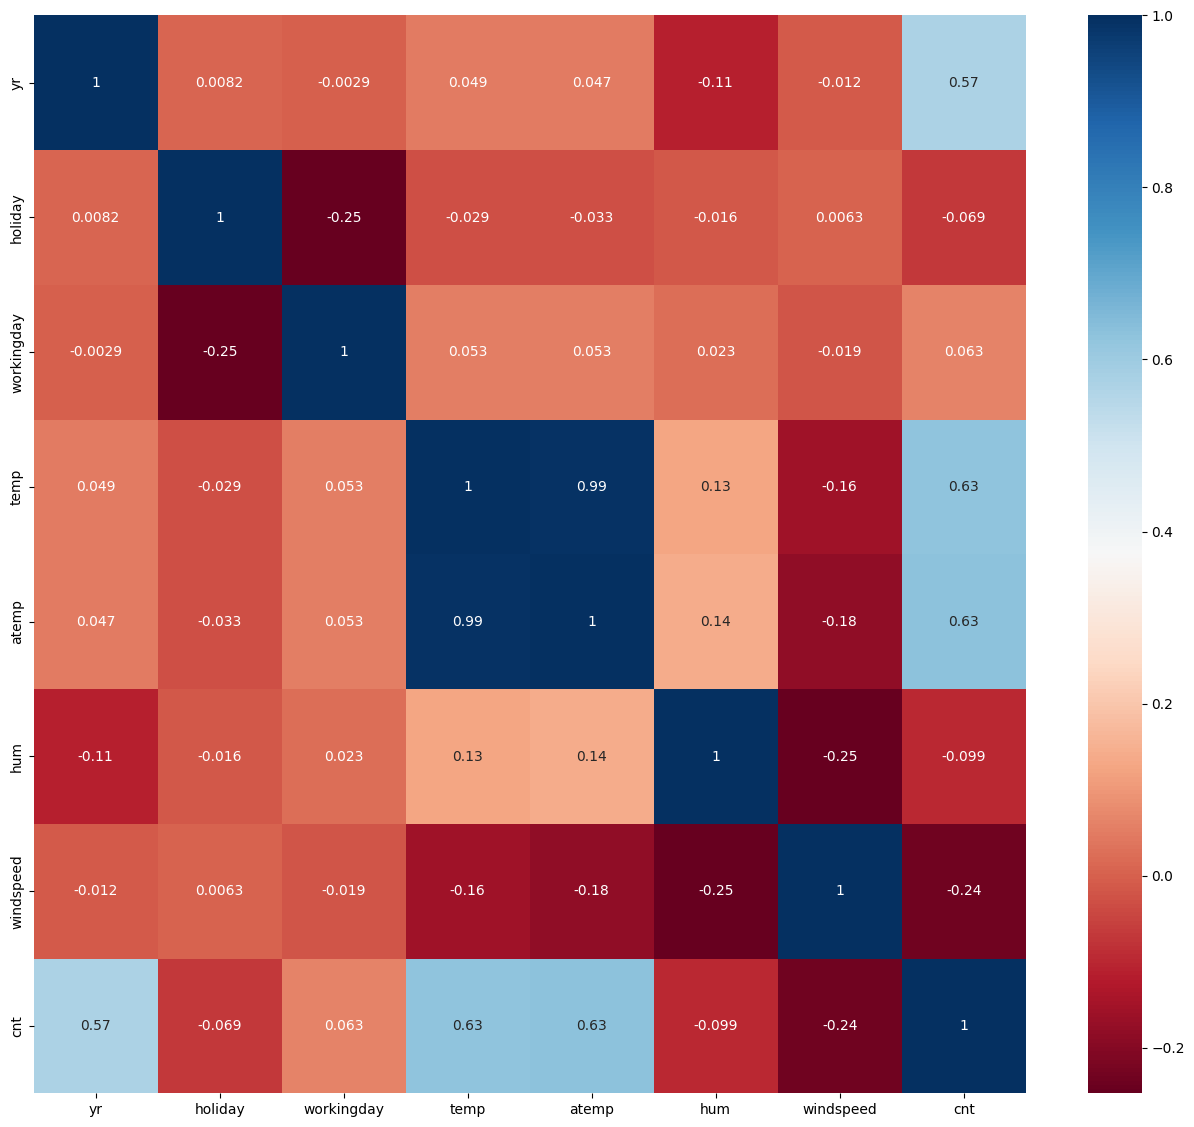

In [159]:
plt.figure(figsize = (16,14))
sns.heatmap(bike_heat.corr(), annot = True, cmap="RdBu")
plt.show()

# Create Dummy Variable #

In [170]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_Aug                    730 non-null    bool   
 12  mnth_Dec                    730 non-null    bool   
 13  mnth_Feb                    730 non

In [169]:
bike_new.astype(int)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14,18,80,10,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14,17,69,16,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8,9,43,16,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10,11,65,23,2114,1,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,1,10,12,59,10,3095,1,0,...,0,0,0,0,0,0,1,0,0,1
727,1,0,0,10,12,75,8,1341,1,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10,11,48,23,1796,1,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_Aug                    730 non-null    bool   
 12  mnth_Dec                    730 non-null    bool   
 13  mnth_Feb                    730 non

In [172]:
bike_new.shape

(730, 30)

In [173]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

## Spliting the Data ##

Splitting the data to Train and Test : - We will now split the data into TRAIN and TEST (70:30 ratio) We will use train_test_split method from sklearn package for this

In [174]:
bike_new.shape

(730, 30)

In [175]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_Aug                    730 non-null    bool   
 12  mnth_Dec                    730 non-null    bool   
 13  mnth_Feb                    730 non

In [176]:
import sklearn
from sklearn.model_selection import train_test_split

specify 'random_state' so that the train and test data set always have the same rows

In [177]:
df_train,df_test= train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [178]:
# check the info now
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    bool   
 9   season_Summer               510 non-null    bool   
 10  season_Winter               510 non-null    bool   
 11  mnth_Aug                    510 non-null    bool   
 12  mnth_Dec                    510 non-null    bool   
 13  mnth_Feb                    510 non-nu

In [189]:
df_train.astype(int)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,18,22,58,7,6304,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16,19,49,9,7109,0,0,...,1,0,0,0,0,0,0,1,0,0
212,0,0,1,31,35,55,10,4266,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14,18,83,6,3786,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,5,5,43,24,822,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,1,18,21,40,10,6398,0,1,...,0,0,0,0,0,0,1,0,0,0
444,1,0,1,21,25,82,6,6230,0,1,...,0,0,0,0,1,0,0,0,0,1
46,0,0,1,13,15,42,16,2115,1,0,...,0,0,0,0,1,0,0,0,0,0
374,1,0,1,12,15,64,12,3598,1,0,...,0,0,0,1,0,0,0,0,0,0


In [190]:
df_train.shape

(510, 30)

In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_Spring               219 non-null    bool   
 9   season_Summer               219 non-null    bool   
 10  season_Winter               219 non-null    bool   
 11  mnth_Aug                    219 non-null    bool   
 12  mnth_Dec                    219 non-null    bool   
 13  mnth_Feb                    219 non-nul

In [179]:
df_test.shape

(219, 30)

In [192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    bool   
 9   season_Summer               510 non-null    bool   
 10  season_Winter               510 non-null    bool   
 11  mnth_Aug                    510 non-null    bool   
 12  mnth_Dec                    510 non-null    bool   
 13  mnth_Feb                    510 non-nu

In [97]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

the data 'temp', 'atemp', 'hum', 'windspeed','cnt' are the numerical variables

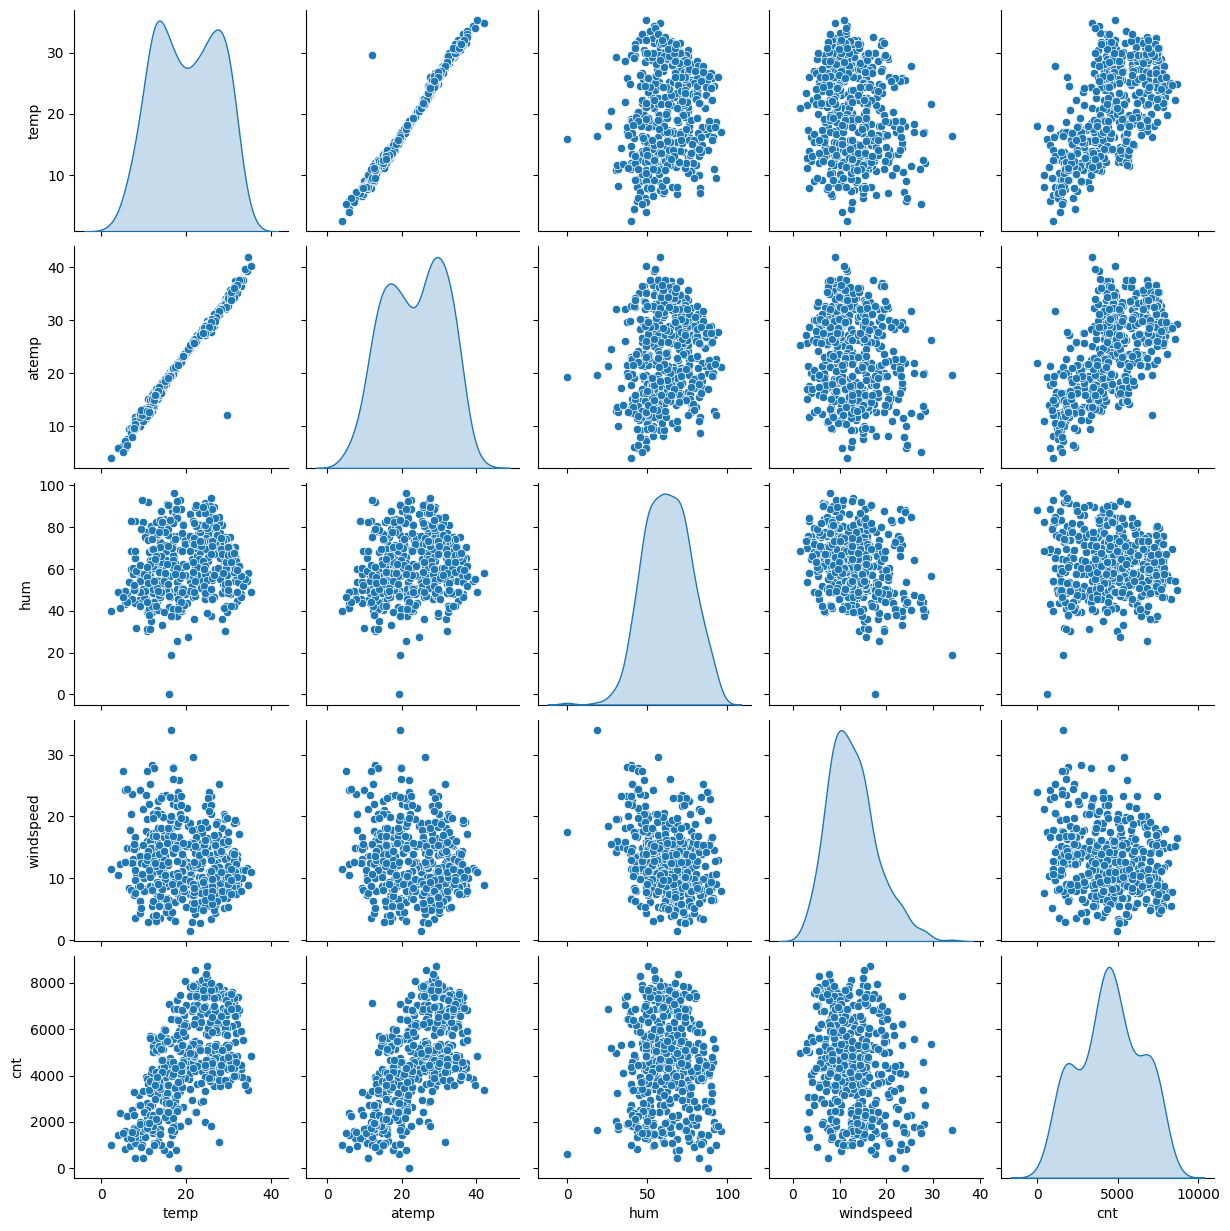

In [193]:
# make a pair plot by using the data

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

As per the above fig there is a "Linear Relation" between 'temp','atemp' and 'cnt'

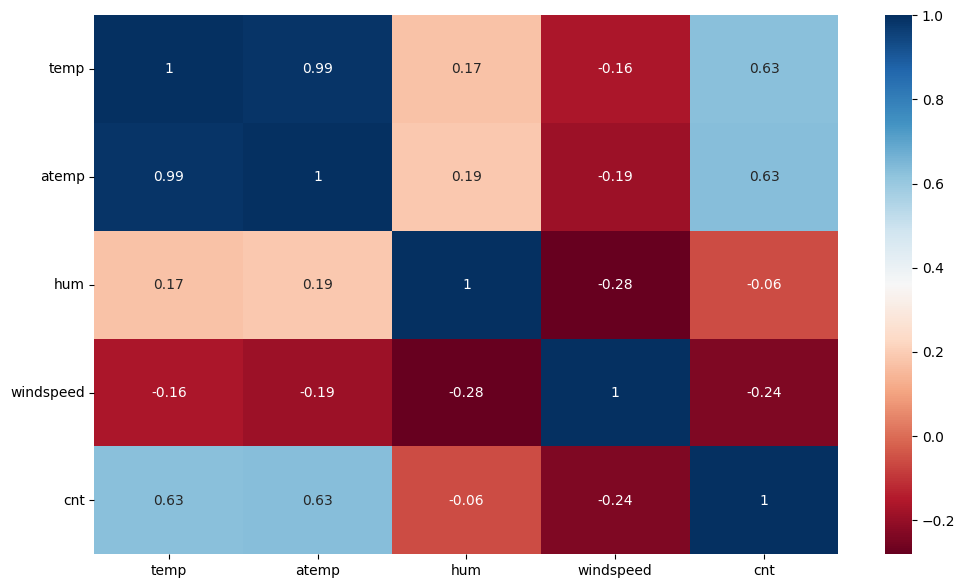

In [194]:
plt.figure(figsize = (12,7))
sns.heatmap(bike_num.corr(), annot = True, cmap="RdBu")
#plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

As per above heat map, there is a high correlation between 'temp','atemp' vs 'cnt'

## Rescaling ##

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [209]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,False,True,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,True,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,True,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [203]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [208]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,False,True,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,True,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,True,False,...,False,False,False,False,False,False,False,False,False,False


In [207]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Model Building ##
Dividing into X and Y sets for the model building

In [108]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

RFE( Recursive feature elimination): We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [109]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [113]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
# running RFE
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', False, 2),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 11),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 14),
 ('mnth_Jul', False, 8),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 6),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 10),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', False, 7)]

In [115]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_Sep', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [116]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_6', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [145]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Build a Linear Model using STATUS MODEL ##
# Model  1 #
 VIF check 

In [146]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
# converting the data type into float to avoid error in next steps
X_train_rfe=X_train_rfe.astype(float)

In [158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
0,yr,1.62
7,season_Spring,1.26
14,weathersit_Light_Snow_Rain,1.13


In [125]:
import statsmodels.api as sm

In [126]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [127]:
# Check the parameters obtained

lr1.params

const                         0.443354
yr                            0.231455
holiday                      -0.014722
workingday                    0.012003
temp                          0.154943
atemp                         0.251008
hum                          -0.243610
windspeed                    -0.201889
season_Spring                -0.153410
mnth_Sep                      0.077933
weekday_1                    -0.021438
weekday_2                    -0.005449
weekday_3                     0.008134
weekday_4                     0.006740
weekday_5                     0.009293
weathersit_Light_Snow_Rain   -0.225762
dtype: float64

In [128]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.45e-172
Time:                        21:41:19   Log-Likelihood:                 472.12
No. Observations:                 510   AIC:                            -914.2
Df Residuals:                     495   BIC:                            -850.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model - 2 ##

Removing the variable 'atemp' based on its Very High 'VIF' value.
Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [129]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

VIF Check

In [130]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,weekday_1,inf
9,weekday_2,inf
10,weekday_3,inf
11,weekday_4,inf
12,weekday_5,inf
4,hum,10.44
3,temp,8.85
5,windspeed,4.75


In [131]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [132]:
lr2.params

const                         0.450938
yr                            0.231571
holiday                      -0.016368
workingday                    0.012062
temp                          0.384589
hum                          -0.240892
windspeed                    -0.211620
season_Spring                -0.155102
mnth_Sep                      0.076474
weekday_1                    -0.020982
weekday_2                    -0.005507
weekday_3                     0.007744
weekday_4                     0.006979
weekday_5                     0.007459
weathersit_Light_Snow_Rain   -0.227345
dtype: float64

In [133]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.14e-172
Time:                        21:43:28   Log-Likelihood:                 470.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     496   BIC:                            -853.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model - 3 ##
Removing the variable 'hum' based on its Very High 'VIF' value.

In [134]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

VIF Check

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
7,weekday_1,inf
8,weekday_2,inf
9,weekday_3,inf
10,weekday_4,inf
11,weekday_5,inf
3,temp,4.90
4,windspeed,4.53
0,yr,1.98


In [136]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [137]:
# Check the parameters obtained

lr3.params

const                         0.275608
yr                            0.238124
holiday                      -0.012246
workingday                    0.011304
temp                          0.376482
windspeed                    -0.152442
season_Spring                -0.145308
mnth_Sep                      0.063420
weekday_1                    -0.023400
weekday_2                    -0.006817
weekday_3                     0.007854
weekday_4                     0.010506
weekday_5                     0.010915
weathersit_Light_Snow_Rain   -0.282931
dtype: float64

In [138]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.73e-162
Time:                        21:45:03   Log-Likelihood:                 443.24
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     497   BIC:                            -805.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model - 4 ##

Removing the variable windspeed based on its Very High 'VIF' value.
Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [139]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

VIF Check

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
6,weekday_1,inf
7,weekday_2,inf
8,weekday_3,inf
9,weekday_4,inf
10,weekday_5,inf
3,temp,3.34
0,yr,1.94
4,season_Spring,1.29


In [141]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [142]:
# Check the parameters obtained

lr4.params

const                         0.220457
yr                            0.236343
holiday                      -0.012400
workingday                    0.013178
temp                          0.382935
season_Spring                -0.153015
mnth_Sep                      0.070087
weekday_1                    -0.022459
weekday_2                    -0.007132
weekday_3                     0.009412
weekday_4                     0.008769
weekday_5                     0.012188
weathersit_Light_Snow_Rain   -0.299625
dtype: float64

In [143]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.04e-157
Time:                        21:46:37   Log-Likelihood:                 429.70
No. Observations:                 510   AIC:                            -835.4
Df Residuals:                     498   BIC:                            -784.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [225]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

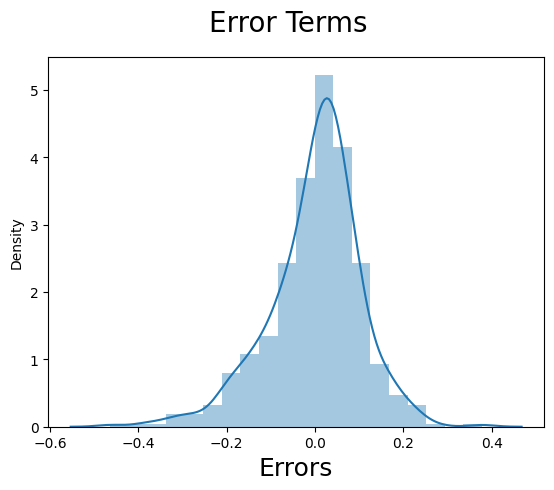

In [226]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

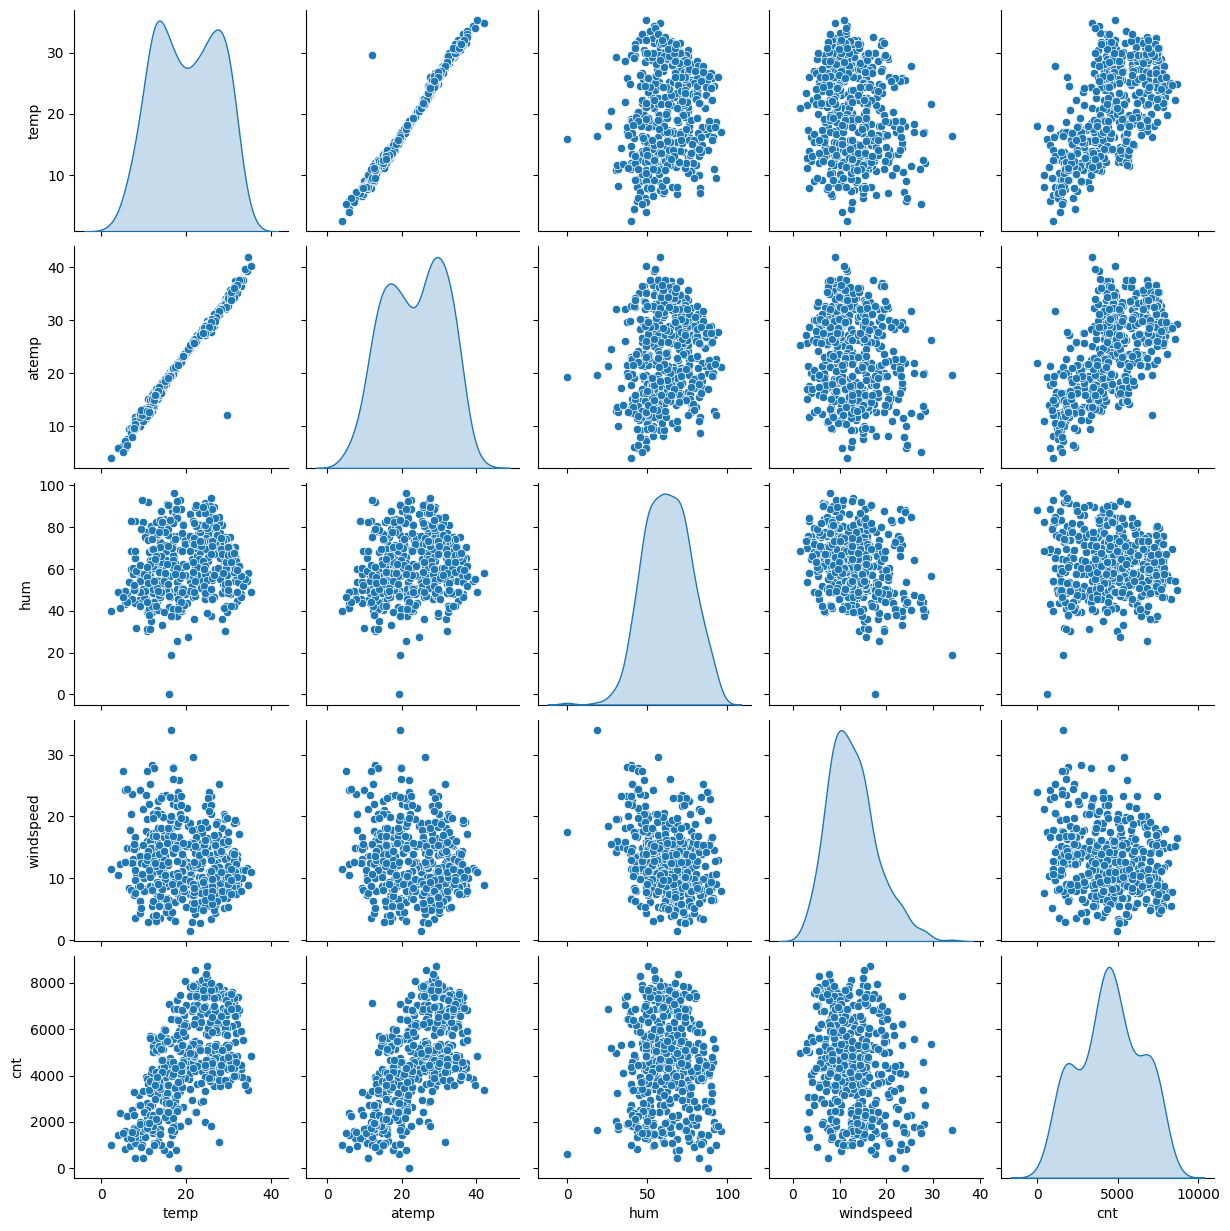

In [231]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [232]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,32.32
7,weekday_3,8.40
6,weekday_2,8.12
9,weekday_5,8.07
8,weekday_4,7.31
5,weekday_1,6.43
2,temp,3.34
0,yr,1.94
3,season_Spring,1.29
4,mnth_Sep,1.14


## Making model predection ##

In [234]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
22,0,0,0,0.046591,0.025950,0.453529,0.462217,True,False,False,...,False,False,False,False,False,False,False,False,False,False
468,1,0,0,0.543115,0.536771,0.522511,0.347424,False,True,False,...,False,False,False,False,False,False,False,True,False,False
553,1,0,0,0.951196,0.933712,0.596104,0.212829,False,False,False,...,False,False,False,False,False,False,False,False,False,False
504,1,0,0,0.699909,0.662746,0.551083,0.478229,False,True,False,...,False,False,False,False,False,False,False,False,False,False
353,0,0,1,0.407087,0.416610,0.618615,0.080770,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [235]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380


In [239]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   season_Spring               219 non-null    bool   
 5   mnth_Sep                    219 non-null    bool   
 6   weekday_1                   219 non-null    bool   
 7   weekday_2                   219 non-null    bool   
 8   weekday_3                   219 non-null    bool   
 9   weekday_4                   219 non-null    bool   
 10  weekday_5                   219 non-null    bool   
 11  weathersit_Light_Snow_Rain  219 non-null    bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 10.3 KB


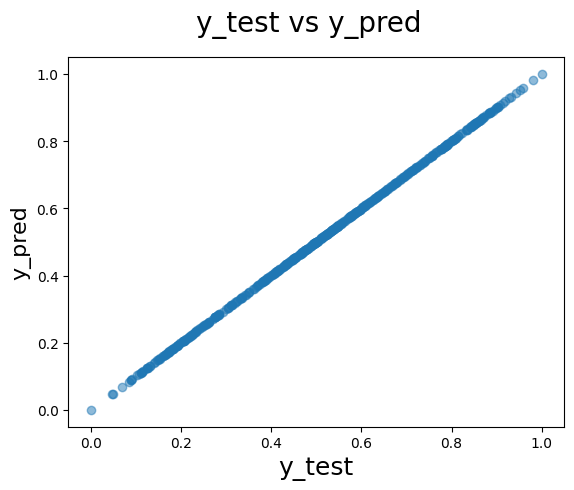

In [245]:
fig = plt.figure()
plt.scatter(y_train, y_train, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()